MLI Module 4 Assignment 1, Lukas Zbinden

see Module 4 - Lecture 17 - Regularisation and Optimisation.pdf on L1 and L2

In [1]:
import pandas as pd # data frames
import numpy as np

In [2]:
# read data
df = pd.read_csv("MLI Data Assignment 1.csv", index_col='year')
df.head()

,qr,roe,wcoa,reoa,eoa,edr,dd,sr,vol,return
year,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985.0,6.979253,-0.025060,0.825243,-1.762136,-0.327184,119.490500,1.439205,5.258117,0.639888,3.365
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985.0,0.366087,0.145088,0.460968,0.430453,0.114718,2.108288,1.017459,2.859285,1.140449,3.261
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(43870, 10)

In [4]:
df.describe()

,qr,roe,wcoa,reoa,eoa,edr,dd,sr,vol,return
count,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000
mean,2.058294,-5.668109,-2.177798,-19.911232,-0.887694,29.342611,1.367895,0.274550,5.665615,1.203678
std,20.528246,606.173803,185.189412,657.400766,50.153790,472.762696,16.134272,1.484090,141.266594,26.252376
min,0.000008,-88875.137010,-25967.974360,-55576.000000,-6313.000000,0.000020,-1967.526223,-2.533056,0.019629,-1.000000
25%,0.076733,-0.117017,0.206121,-0.521662,-0.051757,1.051082,0.904552,-0.453150,0.377869,-0.343500
50%,0.305719,0.025415,0.438835,0.017834,0.038708,3.366596,1.519760,-0.032473,0.596584,-0.021000
75%,1.119911,0.070114,0.665494,0.198595,0.096758,10.878026,2.385868,0.681469,0.991382,0.344000
max,2204.000000,7468.650000,0.999723,2.073072,6.475407,45718.500000,50.941268,91.532453,9898.965329,1765.906000


In [5]:
# remove all null values if any?
df.isnull().sum()[df.isnull().sum() != 0]

qr        21935
roe       21935
wcoa      21935
reoa      21935
eoa       21935
edr       21935
dd        21935
sr        21935
vol       21935
return    21935
dtype: int64

In [6]:
# drop all rows with NaN/null values
df = df.dropna(axis=0)
# check again
print(df.isnull().sum()[df.isnull().sum() != 0])
print(df.shape)

Series([], dtype: int64)
(21935, 10)


In [7]:
df.describe()

,qr,roe,wcoa,reoa,eoa,edr,dd,sr,vol,return
count,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000
mean,2.058294,-5.668109,-2.177798,-19.911232,-0.887694,29.342611,1.367895,0.274550,5.665615,1.203678
std,20.528246,606.173803,185.189412,657.400766,50.153790,472.762696,16.134272,1.484090,141.266594,26.252376
min,0.000008,-88875.137010,-25967.974360,-55576.000000,-6313.000000,0.000020,-1967.526223,-2.533056,0.019629,-1.000000
25%,0.076733,-0.117017,0.206121,-0.521662,-0.051757,1.051082,0.904552,-0.453150,0.377869,-0.343500
50%,0.305719,0.025415,0.438835,0.017834,0.038708,3.366596,1.519760,-0.032473,0.596584,-0.021000
75%,1.119911,0.070114,0.665494,0.198595,0.096758,10.878026,2.385868,0.681469,0.991382,0.344000
max,2204.000000,7468.650000,0.999723,2.073072,6.475407,45718.500000,50.941268,91.532453,9898.965329,1765.906000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 21935 entries, 1985.0 to 2017.0
Data columns (total 10 columns):
qr        21935 non-null float64
roe       21935 non-null float64
wcoa      21935 non-null float64
reoa      21935 non-null float64
eoa       21935 non-null float64
edr       21935 non-null float64
dd        21935 non-null float64
sr        21935 non-null float64
vol       21935 non-null float64
return    21935 non-null float64
dtypes: float64(10)
memory usage: 1.8 MB


In [9]:
df.index = df.index.astype(int)

In [10]:
# defining vars
input_vars = ["qr", "roe", "wcoa", "reoa", "eoa", "edr", "dd", "sr", "vol"]
target = ["return"]

In [11]:
# have a look at the 9 independent variables
X = df.drop(labels=target, axis=1)
X.head()

,qr,roe,wcoa,reoa,eoa,edr,dd,sr,vol
year,,,,,,,,,
1985,6.979253,-0.025060,0.825243,-1.762136,-0.327184,119.490500,1.439205,5.258117,0.639888
1985,0.366087,0.145088,0.460968,0.430453,0.114718,2.108288,1.017459,2.859285,1.140449
1985,0.167489,0.009445,0.494797,0.185266,0.138259,15.030330,0.171042,0.477294,4.755013
1985,0.049812,0.016664,0.321690,0.114644,0.105986,10.288281,1.109971,2.946292,0.678819
1985,0.926230,0.064134,0.689753,0.170997,0.145380,11.486287,1.360837,2.831762,0.679110


In [12]:
# check out the dependent variable
y = df.drop(labels=input_vars, axis=1)
y.head()

,return
year,
1985,3.365
1985,3.261
1985,2.270
1985,2.000
1985,1.923


In [13]:
#  let's make an experiment and automatically detect outliers by means of IsolationForest
import time
from sklearn.ensemble import IsolationForest
start = time.time()
    
If = IsolationForest()
If.fit(X) 
y_pred = If.predict(X)

np.count_nonzero(y_pred == -1)

C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


2194

In [14]:
hist = np.histogram(y_pred, bins=2)
print(f"#Outliers: {hist[0][0]}\n#Inliers: {hist[0][1]}")

#Outliers: 2194
#Inliers: 19741


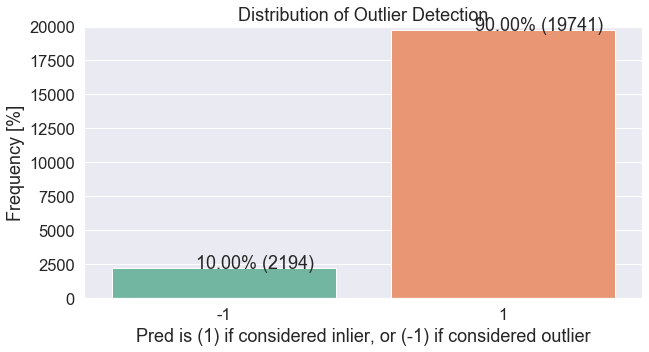

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x = y_pred ,palette="Set2")
sns.set(font_scale=1.5)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=round(y_pred.shape[0], -len(str(y_pred.shape[0]))+1))
for p in ax.patches:
    ax.annotate('{:.2f}% ({})'.format(100*p.get_height()/len(y_pred), p.get_height()), 
                (p.get_x()+ 0.3, p.get_height()+10))

plt.title('Distribution of Outlier Detection')
plt.xlabel('Pred is (1) if considered inlier, or (-1) if considered outlier')
plt.ylabel('Frequency [%]')
plt.show()

From the plot above we can see that about 10% of the data is considered outlier by the anomaly detection model IsolationForest. We will run experiments with both the entire dataset and just the inlier dataset as determined by the IsolationForest.

In [17]:
# remove outliers from data
df_wo_outliers = df[y_pred == 1]
df_wo_outliers.shape

(19741, 10)

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler

# define multiple linear regression models:
# 'linReg': multiple linear regression without regularization
# 'lasso': multiple linear regression with L1 regularization
# 'ridge': multiple linear regression with L2 regularization
# 'elnet': multiple linear regression with Elastic Net (=combined L1 and L2) regularization 

# 1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20
# elnet: 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10

num_linspace = 8
models_and_parameters = {
    'linReg': (LinearRegression(), 
              {}),  # has no params
    'lasso': (Lasso(), 
              {'alpha': [1]}),  # constant that multiplies the L1 term
    'ridge': (Ridge(), 
              {'alpha': [1]}),  # constant that multiplies the L2 term
    'elnet': (ElasticNet(), 
              # 'alpha': constant that multiplies the penalty terms
              {'alpha': [1],  
               # 'l1_ratio': the mixing parameter, with 0 <= l1_ratio <= 1.
               # if 0 < l1_ratio < 1, then the penalty is a combination of L1 and L2.
               # if l1_ratio = 1, then L1 penalty. If l1_ratio = 0, then L2 penaltyy.
               'l1_ratio': np.linspace(0.0001, 0.9999, num=num_linspace)})
            
}

SEED = 12345  # will ensure different results on each iteration
K_FOLD_NUM = 10
REFIT_METRIC = 'MSE'

mse_scorer = metrics.make_scorer(mean_squared_error)

k_folds = KFold(n_splits=K_FOLD_NUM, random_state=SEED, shuffle=True)

In [19]:
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=SEED)

# scale the data
scaler_x = StandardScaler().fit(X_train)
X_train = scaler_x.transform(X_train)
X_test = scaler_x.transform(X_test)

# Linear Regression (no regularization)

In [20]:
lin_reg_model = GridSearchCV(estimator=models_and_parameters['linReg'][0], 
                     param_grid=models_and_parameters['linReg'][1], 
                     scoring=mse_scorer, 
                     cv=k_folds, 
                     refit=REFIT_METRIC)
lin_reg_model.fit(X_train, y_train.values.ravel())

C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=KFold(n_splits=10, random_state=12345, shuffle=True),
             error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=None, param_grid={}, pre_dispatch='2*n_jobs',
             refit='MSE', return_train_score=False,
             scoring=make_scorer(mean_squared_error), verbose=0)

# Lasso Regression (L1 regularization)

In [21]:
lasso_model = GridSearchCV(estimator=models_and_parameters['lasso'][0], 
                     param_grid=models_and_parameters['lasso'][1], 
                     scoring=mse_scorer, 
                     cv=k_folds, 
                     refit=REFIT_METRIC)
lasso_model.fit(X_train, y_train.values.ravel())

C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=KFold(n_splits=10, random_state=12345, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None, param_grid={'alpha': [1]},
             pre_dispatch='2*n_jobs', refit='MSE', return_train_score=False,
             scoring=make_scorer(mean_squared_error), verbose=0)

# Ridge Regression (L2 regularization)

In [22]:
ridge_model = GridSearchCV(estimator=models_and_parameters['ridge'][0], 
                     param_grid=models_and_parameters['ridge'][1], 
                     scoring=mse_scorer, 
                     cv=k_folds, 
                     refit=REFIT_METRIC)
ridge_model.fit(X_train, y_train.values.ravel())

C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=KFold(n_splits=10, random_state=12345, shuffle=True),
             error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None, param_grid={'alpha': [1]},
             pre_dispatch='2*n_jobs', refit='MSE', return_train_score=False,
             scoring=make_scorer(mean_squared_error), verbose=0)

# ElasticNet Regression

In [23]:
elnet_model = GridSearchCV(estimator=models_and_parameters['elnet'][0], 
                     param_grid=models_and_parameters['elnet'][1], 
                     scoring=mse_scorer, 
                     cv=k_folds, 
                     refit=REFIT_METRIC)
elnet_model.fit(X_train, y_train.values.ravel())

C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=KFold(n_splits=10, random_state=12345, shuffle=True),
             error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1],
                         'l1_ratio': array([1.00000000e-04, 1.42928571e-01, 2.85757143e-01, 4.28585714e-01,
       5.71414286e-01, 7.14242857e-01, 8.57071429e-01, 9.99900000e-01])},
             pre_dispatch='2*n_jobs', refit='MSE', return_train_score=False,
             scoring=make_scorer(mean_squared_error), verbose=0)

In [24]:
y_test_pred_linreg = lin_reg_model.best_estimator_.predict(X_test)
print("Results Linear Regression")
print("-------------------------")
print("Best params.......:", lin_reg_model.best_params_)
print("Train MSE.........:", lin_reg_model.best_score_)
print(f"Test MSE..........: {mean_squared_error(y_test.values.ravel(), y_test_pred_linreg.ravel())}")
print("Best intercept....:", lin_reg_model.best_estimator_.intercept_)
print("Best coefficients.:\n", lin_reg_model.best_estimator_.coef_)
print("\n")

y_test_pred_lasso = lasso_model.best_estimator_.predict(X_test)
print("Results Lasso Regression")
print("------------------------")
print("Best params.......:", lasso_model.best_params_)
print("Train MSE.........:", lasso_model.best_score_)
print(f"Test MSE..........: {mean_squared_error(y_test.values.ravel(), y_test_pred_lasso.ravel())}")
print("Best intercept....:", lasso_model.best_estimator_.intercept_)
print("Best coefficients.:\n", lasso_model.best_estimator_.coef_)
print("\n")

y_test_pred_ridge = ridge_model.best_estimator_.predict(X_test)
print("Results Ridge Regression")
print("------------------------")
print("Best params.......:", ridge_model.best_params_)
print("Train MSE.........:", ridge_model.best_score_)
print(f"Test MSE..........: {mean_squared_error(y_test.values.ravel(), y_test_pred_ridge.ravel())}")
print("Best intercept....:", ridge_model.best_estimator_.intercept_)
print("Best coefficients.:\n", ridge_model.best_estimator_.coef_)
print("\n")

y_test_pred_elnet = elnet_model.best_estimator_.predict(X_test)
print("Results ElasticNet Regression")
print("-----------------------------")
print("Best params.......:", elnet_model.best_params_)
print("Train MSE.........:", elnet_model.best_score_)
print(f"Test MSE..........: {mean_squared_error(y_test.values.ravel(), y_test_pred_elnet.ravel())}")
print("Best intercept....:", elnet_model.best_estimator_.intercept_)
print("Best coefficients.:\n", elnet_model.best_estimator_.coef_)

Results Linear Regression
-------------------------
Best params.......: {}
Train MSE.........: 570.3700713329953
Test MSE..........: 718.3170402374009
Best intercept....: 1.2064636576787808
Best coefficients.:
 [-0.00928666 -0.24020117  0.32722486 -0.07266546  0.03822947 -0.06088482
 -0.16473493  6.17379879  7.18738495]


Results Lasso Regression
------------------------
Best params.......: {'alpha': 1}
Train MSE.........: 540.2939327856618
Test MSE..........: 739.0982175849905
Best intercept....: 1.2064636576787808
Best coefficients.:
 [-0.          0.          0.         -0.         -0.         -0.
 -0.          5.16859254  6.18566648]


Results Ridge Regression
------------------------
Best params.......: {'alpha': 1}
Train MSE.........: 569.0009421143986
Test MSE..........: 718.3262299587414
Best intercept....: 1.2064636576787808
Best coefficients.:
 [-0.00929032 -0.23809823  0.32498599 -0.07263287  0.0385919  -0.06087113
 -0.1643886   6.1733912   7.18691833]


Results ElasticNet R

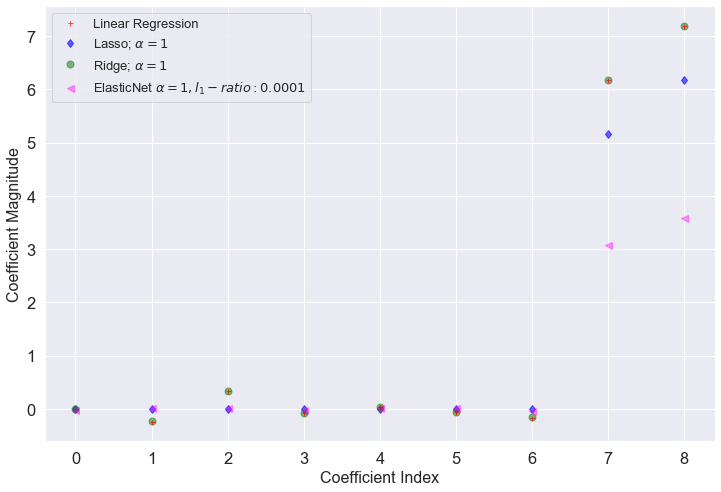

In [47]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(lin_reg_model.best_estimator_.coef_,alpha=0.7,linestyle='none',marker='+',markersize=5,color='red',label=r'Linear Regression',zorder=7)
plt.plot(lasso_model.best_estimator_.coef_,alpha=0.6,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 1$')
plt.plot(ridge_model.best_estimator_.coef_,alpha=0.5,linestyle='none',marker='o',markersize=7,color='green',label=r'Ridge; $\alpha = 1$')
plt.plot(elnet_model.best_estimator_.coef_,alpha=0.4,linestyle='none',marker='<',markersize=7,color='magenta',label=r'ElasticNet $\alpha = 1, l_1-{ratio}: 0.0001$')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=0)
plt.show()

In [48]:
diff_linreg_ridge_coef = lin_reg_model.best_estimator_.coef_ - ridge_model.best_estimator_.coef_
diff_linreg_ridge_coef

array([ 3.66492656e-06, -2.10294066e-03,  2.23887636e-03, -3.25986763e-05,
       -3.62426357e-04, -1.36885200e-05, -3.46339533e-04,  4.07581430e-04,
        4.66621327e-04])

In [49]:
diff_linreg_elnet_coef = lin_reg_model.best_estimator_.coef_ - elnet_model.best_estimator_.coef_
diff_linreg_elnet_coef

array([ 0.01012858, -0.25462113,  0.31437396, -0.0446121 ,  0.02170854,
       -0.06733123, -0.12078203,  3.09244456,  3.59700928])

# Questions to Answer:

### 1) Describe how the results change when you add each of the regularization techniques
Linear Regression is our baseline. From the chart above we notice that coefficient 7 and 8 are highest implying that features 8 and 9 from the dataset seem to be most predictive of the target (i.e. are selected by the model for prediction). The other coefficients are close to zero and seem only contributing in a non-significant way.

Considering Lasso (L1) regression with alpha = 1, we see that all but the last two coefficents are zero, thus not being considered at all by the model. Further, the last two coefficents are smaller than with linear regression.

With Ridge (L2) regression, the coefficients change only marginally when using alpha = 1.

With ElasticNet however, the coefficients are squashed towards zero, yet all coefficients remain non-zero and still contribute to the target prediction.

### 2) Which variables change with L1, L2 and Elastic Net regressions and why?
L1: variables/coefficients 0-6 become zero, 7 and 8 become reduced. The largest coefficients 7 and 8 change the most (reduced) because the model gets penalized the most when it increases those during fitting.

L2: all coefficients change only marginally, the numerical differences are shown above. 

ElasticNet: coefficients 7 and 8 change significantly while the remaining are changed only marginally. It is due to the combination of L1 and L2 penalties.


### 3) How did you determine to set the p parameter for L1 and L2 regressions and the λ parameters for the Elastic Net?
We first performed a grid search with a range of values where we acquired a basic intuition for sensible values (using MSE as the metric). Later we set with alpha = 1 (i.e. p) to have a baseline value with which to compare the models. The λ values of 0.0001 also stems from the grid search.


### 4) What are the advantages and disadvantages of each of the regularization techniques and how are they reflected in your results?
With L1 we clearly see which coefficients and features, respectively, are used by the model for fitting. Thus it can serve us in feature selection or at least to give a first intuition which features are most predictive of the target.

L2 helps to shrink the coefficients and thereby to reduce the model complexity.

ElasticNet: combines L1 and L2.
